#### 10 steps for EDA

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# 1st step is shape
df= sns.load_dataset("titanic")

rows,cols = df.shape


In [6]:
rows

891

In [7]:
cols

15

In [8]:
# step 2 data sutructure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [10]:
# find missing value

df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [11]:
# percent calculation of missing value
df.isnull().sum() / df.shape[0] *100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [12]:
# step 4 split variables for new columns
# for example we have data that have comma values in it

city = pd.DataFrame(np.array([["Lahore,Pakistan",67,100],["Beijing,China",5,6],["Berlin,Germany",8,9],]),
columns=['address','males','females'])

city


,address,males,females
0,"Lahore,Pakistan",67,100
1,"Beijing,China",5,6
2,"Berlin,Germany",8,9


In [17]:
# so we must split data lahore pakistan into two columns/Feature Engineering
city[['city','country']] = city['address'].str.split(',', expand=True)

In [18]:
city

,address,males,females,city,country
0,"Lahore,Pakistan",67,100,Lahore,Pakistan
1,"Beijing,China",5,6,Beijing,China
2,"Berlin,Germany",8,9,Berlin,Germany


In [19]:
# type casting

In [20]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  3 non-null      object
 1   males    3 non-null      object
 2   females  3 non-null      object
 3   city     3 non-null      object
 4   country  3 non-null      object
dtypes: object(5)
memory usage: 248.0+ bytes


In [22]:
city[["males","females"]] = city[["males","females"]].astype(int)

In [23]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  3 non-null      object
 1   males    3 non-null      int32 
 2   females  3 non-null      int32 
 3   city     3 non-null      object
 4   country  3 non-null      object
dtypes: int32(2), object(3)
memory usage: 224.0+ bytes


In [24]:
# step 6 summary statistics
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [25]:
# step 7 value count of specific column


In [26]:
df['age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: age, Length: 88, dtype: int64

In [27]:
# finding unique values
df["class"].unique()

['Third', 'First', 'Second']
Categories (3, object): ['First', 'Second', 'Third']

In [29]:
#step8 deals with duplication/ and or null values (mean,media,other method)
df = sns.load_dataset("titanic")
df[df.embark_town == "Queenstown"]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
16,0,3,male,2.0,4,1,29.1250,Q,Third,child,False,NaN,Queenstown,no,False
22,1,3,female,15.0,0,0,8.0292,Q,Third,child,False,NaN,Queenstown,yes,True
28,1,3,female,NaN,0,0,7.8792,Q,Third,woman,False,NaN,Queenstown,yes,True
32,1,3,female,NaN,0,0,7.7500,Q,Third,woman,False,NaN,Queenstown,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
790,0,3,male,NaN,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,no,True
825,0,3,male,NaN,0,0,6.9500,Q,Third,man,True,NaN,Queenstown,no,True
828,1,3,male,NaN,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,yes,True
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False


array([[<AxesSubplot:title={'center':'Cherbourg'}>,
        <AxesSubplot:title={'center':'Queenstown'}>],
       [<AxesSubplot:title={'center':'Southampton'}>, <AxesSubplot:>]],
      dtype=object)

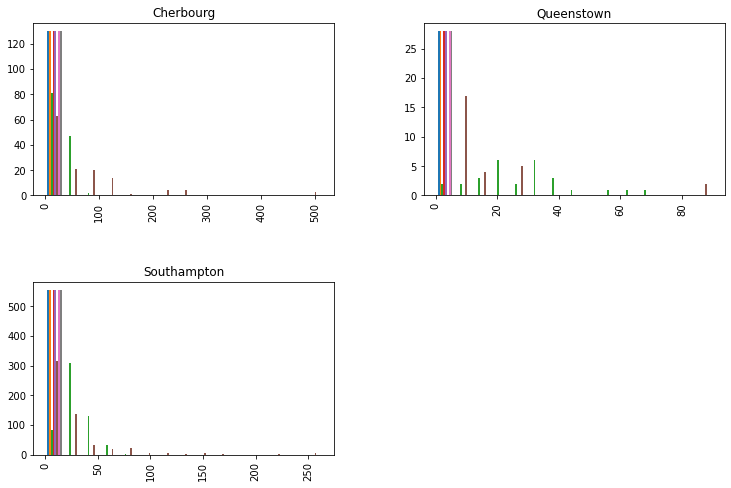

In [32]:
df.hist(by='embark_town', figsize=[12, 8], bins=15)

<AxesSubplot:xlabel='age', ylabel='Count'>

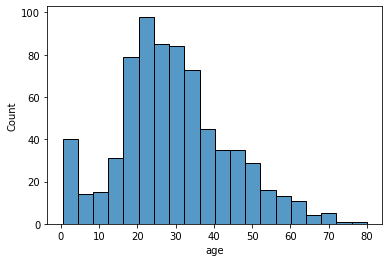

In [33]:
sns.histplot(df['age'])

In [34]:
# measures its skewness aand kurtosis
df['age'].agg(['skew','kurtosis']).transpose()

skew        0.389108
kurtosis    0.178274
Name: age, dtype: float64

##### he values for asymmetry and kurtosis between -2 and +2 are considered acceptable in order to prove normal univariate distribution (George & Mallery, 2010). Hair et al. (2010) and Bryne (2010) argued that data is considered to be normal if skewness is between ‐2 to +2 and kurtosis is between ‐7 to +7

c:\Users\Biscode\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

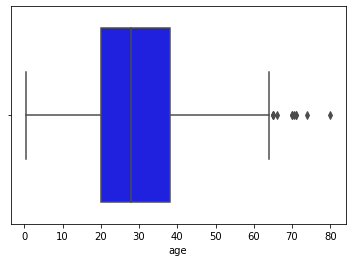

In [35]:
sns.boxplot(df['age'],color= "blue")

In [37]:
# step 10 corelation
corr = df.corr(method="pearson")
corr

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


In [42]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,male
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,True
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,True


In [50]:
#correlation between maleand female

df.head()
df['sex'] == 'male'
df['male'] = df['sex'] == 'male'
df['male']

0       True
1      False
2      False
3      False
4       True
       ...  
886     True
887    False
888    False
889     True
890     True
Name: male, Length: 891, dtype: bool

In [47]:
df['sex'] == 'male'
df['female'] = df['sex'] == 'female'
df['female']

0      False
1       True
2       True
3       True
4      False
       ...  
886    False
887     True
888     True
889    False
890    False
Name: female, Length: 891, dtype: bool

In [51]:
corr = df['male'].corr(df['female'])

In [54]:
corr

-0.9999999999999999